In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
def runge(x: int) -> int:
    return 1 / (1 + 25 * x**2)

class DataSet:
    def __init__(self, dataNum: int) -> None:
        self.x = np.random.uniform(-1, 1, dataNum).reshape(-1, 1)
        self.y = runge(self.x)
        self.x_t = torch.tensor(self.x, dtype=torch.float32)
        self.y_t = torch.tensor(self.y, dtype=torch.float32)

In [10]:
trainData = DataSet(800)
validData = DataSet(100)
testData  = DataSet(100)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.seq(x)

 Epoch | trainLoss | validLoss 
-------|-----------|-----------
     0 |  0.564733 |  0.451231 
    50 |  0.045424 |  0.055026 
   100 |  0.014792 |  0.018247 
   150 |  0.006265 |  0.007465 
   200 |  0.001846 |  0.002091 
   250 |  0.000479 |  0.000529 
   300 |  0.000158 |  0.000167 
   350 |  0.000086 |  0.000083 
   400 |  0.000064 |  0.000059 
   450 |  0.000052 |  0.000048 
   500 |  0.000043 |  0.000039 
   550 |  0.000036 |  0.000033 
   600 |  0.000029 |  0.000027 
   650 |  0.000024 |  0.000023 
   700 |  0.000020 |  0.000019 
   750 |  0.000016 |  0.000016 
   800 |  0.000014 |  0.000013 
   850 |  0.000011 |  0.000012 
   900 |  0.000010 |  0.000010 
   950 |  0.000008 |  0.000009 

Final loss: 0.000007


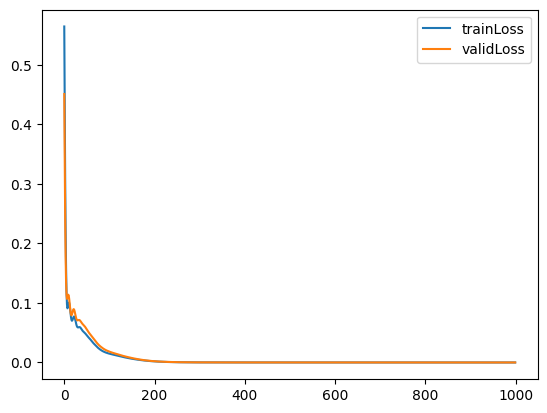

In [14]:
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

trainEpoch = 1000
epochlist = np.arange(1000)
trainlosslist = []
validlosslist = []

print(" Epoch | trainLoss | validLoss ")
print("-------|-----------|-----------")

for epoch in range(trainEpoch):
    optimizer.zero_grad()
    y_pred = net(trainData.x_t)
    trainloss = criterion(y_pred, trainData.y_t)
    trainloss.backward()
    optimizer.step()

    y_valid = net(validData.x_t)
    validloss = criterion(y_valid, validData.y_t)

    trainlosslist.append(trainloss.item())
    validlosslist.append(validloss.item())
    if epoch % 50 == 0:
        print(f" {epoch:5d} | {trainloss.item():9.6f} | {validloss.item():9.6f} ")

print(f"\nFinal loss: {trainlosslist[-1]:.6f}")
plt.plot(epochlist, trainlosslist, label='trainLoss')
plt.plot(epochlist, validlosslist, label='validLoss')
plt.legend()
plt.show()

testLoss: 0.000011


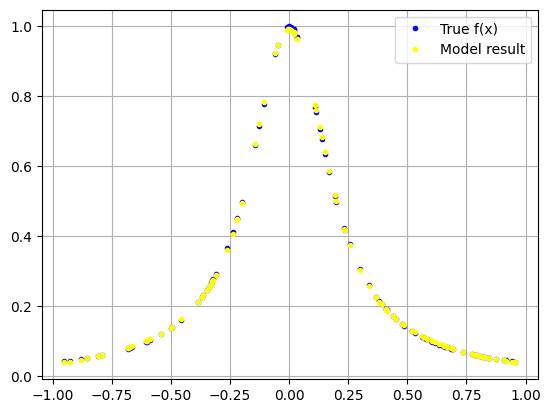

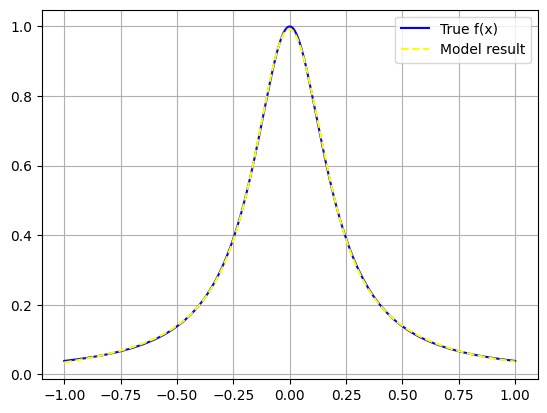

In [15]:
y_pred_t = net(testData.x_t)
y_pred = y_pred_t.detach().numpy()
loss = criterion(y_pred_t, testData.y_t)

print(f"testLoss: {loss:.6f}")

plt.plot(testData.x, testData.y, '.', color='blue', label='True f(x)')
plt.plot(testData.x, y_pred, '.', color='yellow', label='Model result')
plt.legend()
plt.grid(True)
plt.show()

x_axis = np.linspace(-1, 1, 500).reshape(-1, 1)
x_axis_t = torch.tensor(x_axis, dtype=torch.float32)
y_runge = runge(x_axis)
y_net = net(x_axis_t).detach().numpy()

plt.plot(x_axis, y_runge, color='blue', label='True f(x)')
plt.plot(x_axis, y_net, color='yellow', label='Model result', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()